# Risk Assessment Analysis for Lending Loans

### _Problem Statement_: 

"Consumer Finance Company" is the largest online loan marketplace which facilitates personal loans, business loans and financing of medical procedures to its urban customers. As always with the procedure of loan approvals, risk is been associated. Hence different driving factors that can cause the risk needs to be analysed which helps the company to utilize this knowledge for its portifolio and Risk assesment.

### Exploratory Data Analysis for any given data can be done in following procedure
1. Data Sourcing
2. Data Cleaning
3. Data Analysis

    a. Univariate Analysis 
    
    b. Bivariate Analysis
    
    c. Multivariate Analysis
    
    d. Derived Metrics
    
4. Conclusions/ Recommendations

### 1) Data Sourcing and Understanding

##### For this analysis we are taking loan.csv dataset. Hence read "loan.csv" data set using read_csv()

In [68]:
#Import required Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
loan=pd.read_csv('loan.csv',low_memory=False)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [70]:
#Get top 5 rows of dataset to understand Loan dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 2) Data Cleaning

#### Once the data is procured the next step is data cleaning to get rid of Data Quality issues like Formatting errors, missing values, repeated rows, spelling mistakes etc.,

#### Following Data cleaning techniques can be used to ensure Data Quality
1. Fix rows and columns
2. Fix missing values
3. Standardize values
4. Fix Invalid values
5. Filter data

#### Some of the above techniques which applies to this analysis are being implemented

##### 1) Remove Duplicate records

In [71]:
loan.drop_duplicates(keep='first',inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.9+ MB


##### 2) Remove missing values

In [72]:
#Find out percentage of missing values in each column
missing_percent_values = round(loan.isnull().sum()/len(loan.index),2)*100
missing_percent_values

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [73]:
#Let's remove columns having Missing value percentage > 90

columns_missing_values = loan.columns[missing_percent_values > 90]
columns_missing_values

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [74]:
#Above specified columns are being dropped as they contain no values
loan.drop(columns_missing_values , axis=1, inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 55 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

##### 4) Filtering Dataset

In [75]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


##### From the above table is observed that for some columns the mean and max values are 0 which indicates that correponding columns have only 0's as values . Hence these columns are of no use. Let's go ahead and delete them.

In [76]:
mean_zeroes = loan.describe().iloc[1] == 0
columns_to_be_removed = mean_zeroes[mean_zeroes== True].index.values.tolist()
loan.drop(columns_to_be_removed , axis = 1, inplace = True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 50 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
pymnt_plan                 39717 non-null object
url       

#### Using Dictionary.csv let's figure out the columns that are not required for analysis.

> a. desc - Loan description provided by the borrower (Not required for our analysis) as we are not performing any text analysis         
> b. mths_since_last_delinq - The number of months since the borrower's last delinquency. This column can be removed as it will be generated after Loan approval.                   
> c. emp_title - The job title supplied by the Borrower when applying for the loan.                                             
> d. title - The loan title provided by the borrower                                                              
> e. url - URL for the LC page with listing data.

In [77]:
#Let's drop the columns desc,  mths_since_last_delinq
columns_to_be_dropped = ['desc','mths_since_last_delinq','emp_title','title','url']
loan.drop(columns_to_be_dropped, axis=1, inplace=True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 45 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
pymnt_plan                 39717 non-null object
purpose                    39717 non-null object
zip_code  

#### From the dataset it was observed that there are some columns which has only one value for all the records. Such kind of columns aren't helpful for analysis. So let's go ahead and remove them

In [78]:
# Loop across each column and get column that has only one unique value in it.
col_list = []
for i in loan.columns:
    if (len(loan[i].unique()) == 1):
        print(i +" : "+ str(len(loan[i].unique())) + " | Values : " + str(loan[i].unique()))
        col_list.append(i)
        
col_list

pymnt_plan : 1 | Values : ['n']
initial_list_status : 1 | Values : ['f']
policy_code : 1 | Values : [1]
application_type : 1 | Values : ['INDIVIDUAL']


['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type']

In [79]:
# Remove above columns
loan.drop(col_list, axis=1, inplace = True)

In [80]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


##### 5) Fix Invalid Values

In [81]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 41 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
zip_code                   39717 non-null object
addr_state

#### From the above information it was observed that following columns have incorrect datatypes. Let's go ahead and fix them
> 1. int_rate [Interest Rate on the loan] Actual Type : object | Expected type : float64

In [82]:
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype(float)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


#### As per Dictionary.csv, "emp_length" is defined as Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. Hence Let's convert all the values to 0 through 10.

In [83]:
#Format missing and improper values
loan['emp_length'].fillna('0 years', inplace = True)
loan.loc[loan['emp_length'].str.match('< 1 year'),'emp_length'] = '0 year'

#Extract numeric value from 'emp_length' column
loan['emp_length'] = loan['emp_length'].str.extract('(\d+)')

In [84]:
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### After completion of Data Cleaning process we ended up with 41 columns. Let's go ahead and Proceed with next step, Data Analysis with the remained columns.

## 3) Data Analysis

### A) Univariate Analysis:

#### Univariate analysis deals with analyzing one variable at a time. Hence let's go ahead and start analyzing some of the variables in out Loan dataset.

__1. Loan Amount, Funded Amount, Funded Amount By Investors:__

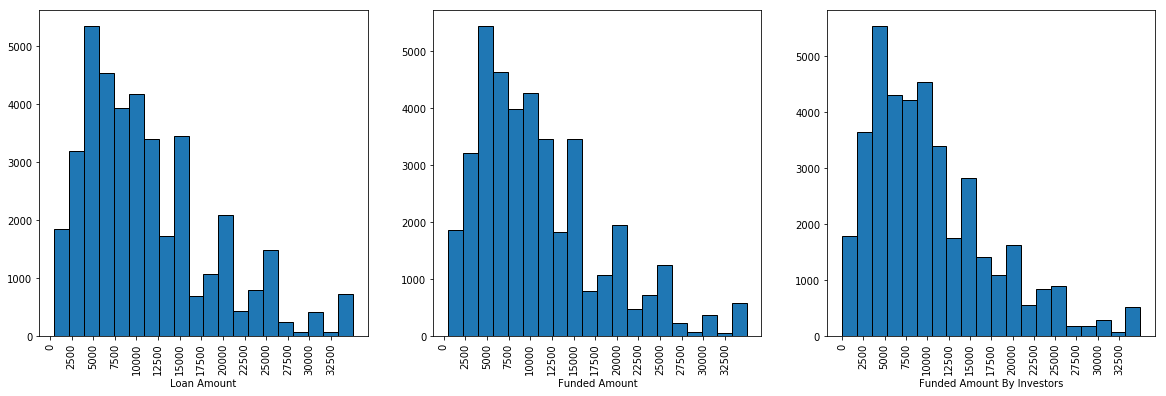

In [85]:
df=loan

#Figure
plt.figure(figsize=[20,6])

#Subplot-1
plt.subplot(1,3,1)
plt.hist(df['loan_amnt'],bins=20,edgecolor='black')
plt.xticks(range(0,35000,2500),rotation=90)
plt.xlabel('Loan Amount')

#Subplot-2
plt.subplot(1,3,2)
plt.hist(df['funded_amnt'],bins=20,edgecolor='black')
plt.xticks(range(0,35000,2500),rotation=90)
plt.xlabel('Funded Amount')

#Subplot-3
plt.subplot(1,3,3)
plt.hist(df['funded_amnt_inv'],bins=20,edgecolor='black')
plt.xticks(range(0,35000,2500),rotation=90)
plt.xlabel('Funded Amount By Investors')

#Show plot
plt.show()

In [86]:
print(df['loan_amnt'].corr(df['funded_amnt']))
print(df['loan_amnt'].corr(df['funded_amnt_inv']))

0.9815782188237627
0.9400335348163549


#####  All the above distributions looks similar which indicates that they are highly co-related and they behave similarly.

__2. Interst Rate:__

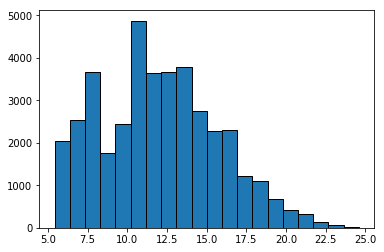

In [87]:
plt.hist(df['int_rate'],bins=20,edgecolor='black')
plt.show();

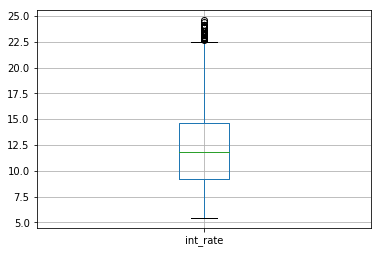

In [88]:
df[['int_rate']].boxplot()

##### From the above diagram we can say that most of Interesst rates lies between 10 and 15

__3. Loan Amount (Box Plot):__

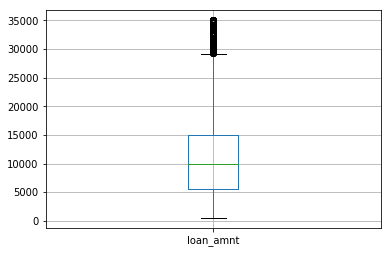

In [89]:
df[['loan_amnt']].boxplot()

#### From the above plot it was observed that outlier are present with loan amount > 30K

__4.Installement:__

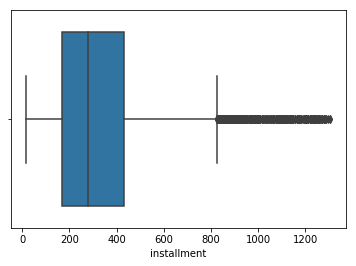

In [90]:
sns.boxplot(df['installment'])

##### Most of the Installment rates are between 200 and 400

__5. Term:__

term
 36 months    29096
 60 months    10621
dtype: int64


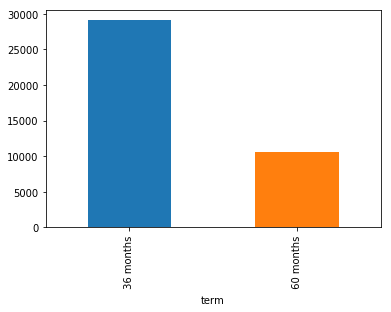

In [91]:
plot_var = df.groupby('term').size()
print(plot_var)
plot_var.plot(kind='bar');

#### There are only two options available for term. 29096 people choosed term as 36 months and 10621 people choosed term as 60 months.                                       



<font color = blue>__Most of the Customers are opting for 36 month plan__</font>

__6. Grade:__

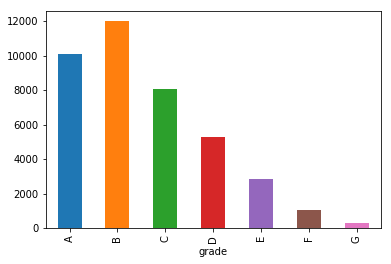

In [92]:
df.groupby('grade').size().plot(kind='bar')

##### Most of the Customers falls under 'B' grade

__7. Sub Grade:__

2917


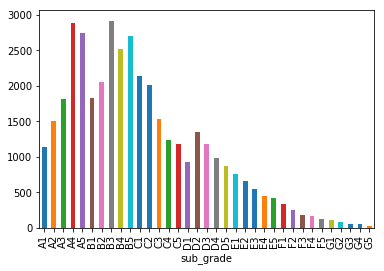

In [93]:
sub_grade = df.groupby('sub_grade').size()
print(sub_grade.max())
sub_grade.plot(kind='bar')

##### It is observed that each grade is further divide into 5-Sub groups. Around 2917 Borrowers are under B3 Sub-grade which is higest.

__8.Home Ownership:__

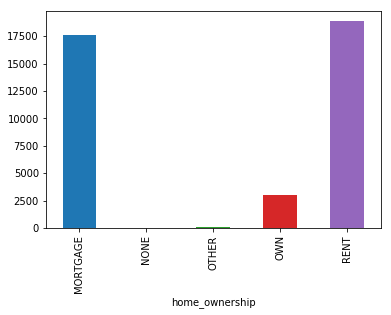

In [94]:
df.groupby('home_ownership').size().plot(kind='bar')

##### Most of the customers are either living in Rental house of Mortgaged property

__9. Annual Income:__

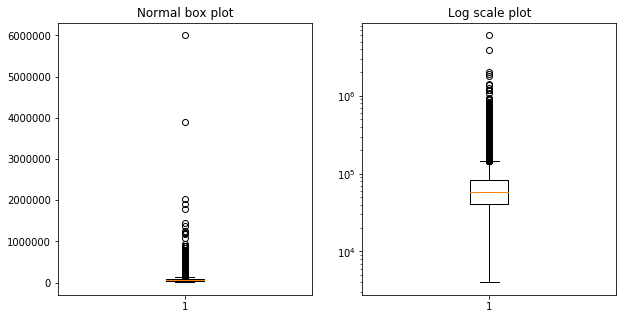

In [95]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.boxplot(df['annual_inc'])
plt.title('Normal box plot')
plt.subplot(1,2,2)
plt.boxplot(df['annual_inc'])
plt.yscale('log')
plt.title('Log scale plot')
plt.show()

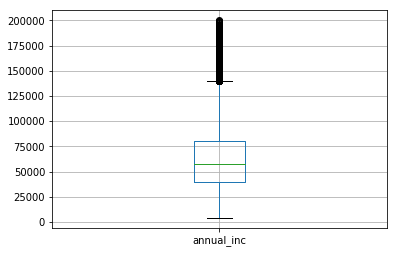

In [96]:
df[df['annual_inc'] < 200000][['annual_inc']].boxplot()

##### There are many outliers for annual income. Most of the values are with in the box of values around 40000 to 75000.

__8. Employement Length:__

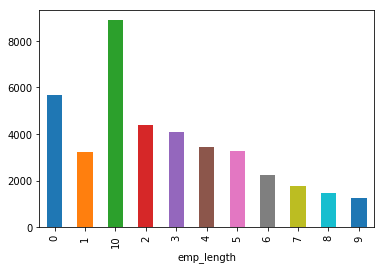

In [97]:
df.groupby('emp_length').size().plot(kind='bar')

##### Most of the employees holds 10 and more than 10 years of experience

### Derive Month and Year from Issued_d column

In [98]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
# Derive month and year from issue_date
df['issued_month'] = df['issue_d'].apply(lambda x: x.month)
df['issued_year'] = df['issue_d'].apply(lambda x: x.year)

In [99]:
df['issued_year'].value_counts()


2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: issued_year, dtype: int64

In [100]:
df['issued_month'].value_counts()

12    4433
11    4167
10    3934
9     3648
8     3518
7     3476
6     3279
5     2999
4     2834
3     2692
1     2379
2     2358
Name: issued_month, dtype: int64

__9. Issued Year:__

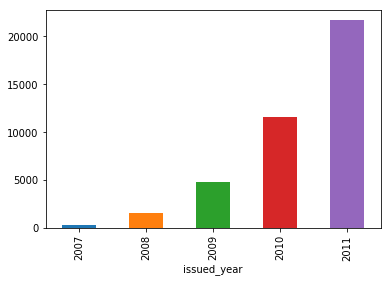

In [101]:
df.groupby('issued_year').size().plot(kind='bar')

##### Most of the loans are issued on 2011

__10. Issued Month:__

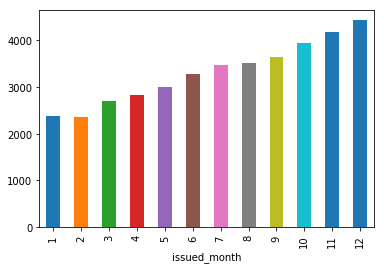

In [102]:
df.groupby('issued_month').size().plot(kind='bar')

##### Maximum loans are issued in the month of December

### C) Bivariate Analysis

#### Bivariate Analysis deals with analysing two variable at a time. As per problem statement, firstly we have to find out proportion of customers whose 'loan_status' is 'charged-off' (called as defaulters) that caused largest amount of loss to the lenders. Hence lets deal with variable  'loan_status'. 

__1. Loan status Vs Loan Amount:__

In [103]:
df.loc[df['loan_amnt'] <= 5500 , 'loan_amnt_Cat'] = 'low'
df.loc[(df['loan_amnt'] > 5500) & (df['loan_amnt'] < 15000) , 'loan_amnt_Cat'] = 'medium'
df.loc[(df['loan_amnt'] >= 15000) & (df['loan_amnt'] < 30000) , 'loan_amnt_Cat'] = 'high'
df.loc[df['loan_amnt'] >= 30000 , 'loan_amnt_Cat'] = 'veryhigh'

loan_amnt_Cat      high       low    medium  veryhigh
loan_status                                          
Charged Off    0.164359  0.136373  0.128212  0.206639
Current        0.051248  0.010460  0.021315  0.110373
Fully Paid     0.784393  0.853168  0.850473  0.682988


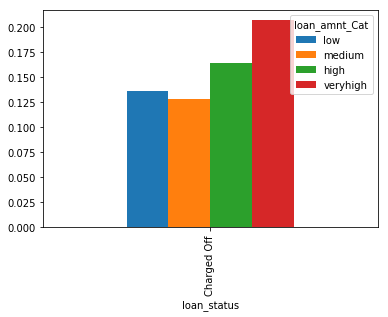

In [104]:
print(pd.crosstab(df['loan_status'],df['loan_amnt_Cat'],normalize='columns'))

pd.crosstab(df['loan_status'],df['loan_amnt_Cat'],normalize='columns')[0:1][['low','medium','high','veryhigh']].plot(kind='bar')

#### Analysis:
1. Above graph depicts that when the loan amount increases, the probability of getting Charged Off also increases.
2. The probability of being a defaulter is low when the Loan amount is between 5,500 to 15,000 when companed with others.
3. There is around 7% of hike for the Loan amount with category 'Low' to 'Very High'

<font color = red>__Giving High amounts of Loans are Risky.__</font>

__2. Loan Status Vs Term:__

term          36 months   60 months
loan_status                        
Charged Off    0.110909    0.225967
Current        0.000000    0.107335
Fully Paid     0.889091    0.666698


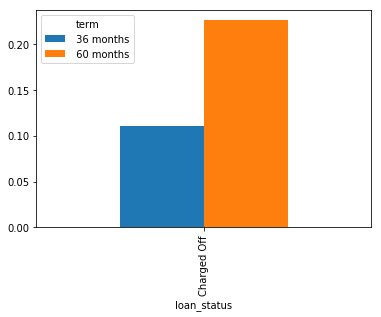

In [105]:
print(pd.crosstab(df['loan_status'],df['term'],normalize='columns'))

pd.crosstab(df['loan_status'],df['term'],normalize='columns')[0:1].plot(kind='bar')

#### Analysis:

1. Customer getting 'Charged Off' for a 60 month period plan is twice compared to 36 month period plan

<font color=red>__It is risky to offer loan for a long term plan (i.e. 60 months) timeperiod.__ </font>

__3. Loan Status Vs Interest Rate:__

In [106]:
df.loc[df['int_rate'] <= 9.25 , 'int_rate_cat'] = 'low'
df.loc[(df['int_rate'] > 9.25) & (df['int_rate'] < 14) , 'int_rate_cat'] = 'medium'
df.loc[df['int_rate'] >= 14 , 'int_rate_cat'] = 'high'

int_rate_cat      high       low    medium
loan_status                               
Charged Off   0.227591  0.059838  0.133616
Current       0.055147  0.004189  0.025854
Fully Paid    0.717262  0.935973  0.840530


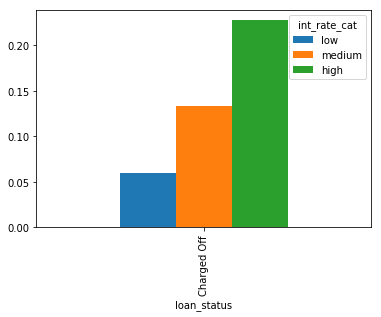

In [107]:
print(pd.crosstab(df['loan_status'],df['int_rate_cat'],normalize='columns'))
pd.crosstab(df['loan_status'],df['int_rate_cat'],normalize='columns')[0:1][['low','medium','high']].plot(kind='bar')

#### Analysis:

1. If the Interest rate is low then the probability of getting Charged Off is also low.
2. There is an exponential increment for the customer being labelled as 'Defaulters' with respect to increase in Interest Rate
3. Around 22% of customers are responsible for loan default with Interest rate greater than 14

<font color = red> __Having Rate of Interest greater than 14 is risky to recover.__ </font>

__4. Loan Status Vs Grade:__

grade               A         B         C         D         E         F  \
loan_status                                                               
Charged Off  0.059693  0.118552  0.166337  0.210665  0.251583  0.304099   
Current      0.003966  0.028702  0.032601  0.041832  0.062984  0.069590   
Fully Paid   0.936341  0.852745  0.801062  0.747503  0.685433  0.626311   

grade               G  
loan_status            
Charged Off  0.319620  
Current      0.053797  
Fully Paid   0.626582  


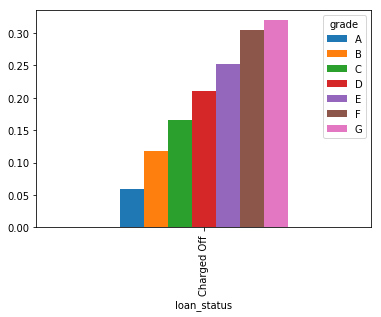

In [108]:
print(pd.crosstab(df['loan_status'],df['grade'],normalize='columns'))
pd.crosstab(df['loan_status'],df['grade'],normalize='columns')[0:1].plot(kind='bar')

#### Analysis:

1. Around 32% G-grade borrowers are responsible for 'Charged off'
2. There is an exponential increase from Grade A through G with respect to being Defaulted.
3. Though most of the customers are 'B-Grade', the Charged off rate is 0.11855 which is less comparitively.

 
<font color = red> __It is risky to lend loan for G-grade customers__ </font>


__5. Loan Status Vs Sub-grade:__

sub_grade      A1    A2    A3    A4    A5    B1    B2    B3    B4    B5 ...  \
loan_status                                                             ...   
Charged Off    30    74   103   178   217   171   228   341   329   356 ...   
Current         0     0     0    13    27    33    56    92    75    89 ...   
Fully Paid   1109  1434  1707  2695  2498  1626  1773  2484  2108  2259 ...   

sub_grade     F1   F2   F3  F4  F5  G1  G2  G3  G4  G5  
loan_status                                             
Charged Off   91   70   51  53  54  31  28  19  13  10  
Current       24   16   11  17   5  10   1   3   2   1  
Fully Paid   214  163  123  98  59  63  49  26  41  19  

[3 rows x 35 columns]
sub_grade          A1        A2        A3        A4        A5        B1  \
loan_status                                                               
Charged Off  0.026339  0.049072  0.056906  0.061677  0.079139  0.093443   
Current      0.000000  0.000000  0.000000  0.004505  0.009847  0.018033

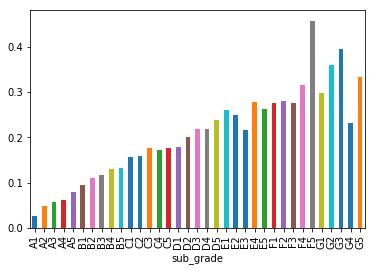

In [109]:
print(pd.crosstab(df['loan_status'],df['sub_grade']))
print(pd.crosstab(df['loan_status'],df['sub_grade'],normalize='columns'))
pd.crosstab(df['loan_status'],df['sub_grade'],normalize='columns').transpose()['Charged Off'].plot(kind='bar')

#### Analysis:

1. There is a sudden spike at F5 sub-grade which holds around 45.76% of 'Charged Off' where A1 holds only 2% which is minimum.

As G-graded loans are more risky but the hike shown here is for F5. This may be because of less data available for loans given G subgrade people. (There are only total of 30 loans in dataset which are given to G5 sub grade)

<font color=red>__Lending Loan to F5 Sub-grade customers puts us into risky__</font>


__6. Loan Status Vs Employment Length:__

emp_length          0         1        10         2         3         4  \
loan_status                                                               
Charged Off  0.153234  0.140741  0.149904  0.129216  0.135531  0.134459   
Current      0.020679  0.021914  0.044036  0.022106  0.020269  0.027357   
Fully Paid   0.826087  0.837346  0.806059  0.848678  0.844200  0.838184   

emp_length          5         6         7         8         9  
loan_status                                                    
Charged Off  0.139549  0.137730  0.148336  0.137255  0.125596  
Current      0.026813  0.027367  0.034969  0.029750  0.025437  
Fully Paid   0.833638  0.834904  0.816695  0.832995  0.848967  


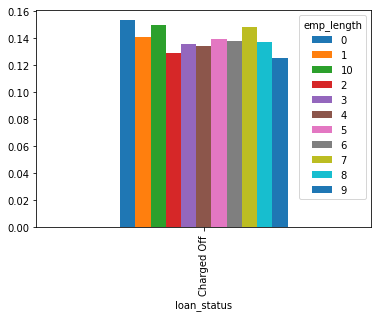

In [110]:
print(pd.crosstab(df['loan_status'],df['emp_length'],normalize='columns'))
pd.crosstab(df['loan_status'],df['emp_length'],normalize='columns')[0:1].plot(kind='bar')

#### Analysis:

1. There is no much difference in Customers with Loan status 'Charged Off' with respect to their employment length.

<font color=blue> __Around 12-14 of customers are charged off w.r.t their Employement length. Hence it's not a good factor to predict the defaulter as there is no trend observed.__</font>

__7. Loan Status Vs Home Ownership:__

home_ownership  MORTGAGE  NONE     OTHER       OWN     RENT
loan_status                                                
Charged Off     0.131774   0.0  0.183673  0.144866  0.15022
Current         0.036129   0.0  0.000000  0.027142  0.02217
Fully Paid      0.832097   1.0  0.816327  0.827992  0.82761


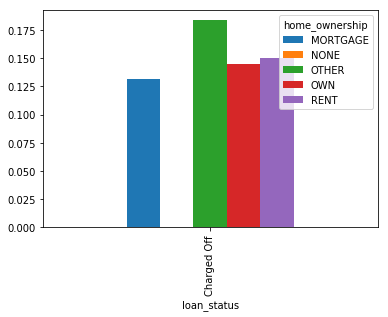

In [111]:
print(pd.crosstab(df['loan_status'],df['home_ownership'],normalize='columns'))
pd.crosstab(df['loan_status'],df['home_ownership'],normalize='columns')[0:1].plot(kind='bar')

#### Analysis:

1. Customers falling under 'Others' category of 'Home_Ownership" are Charged Off with 18.3%
2. Cusomters living in Own houses are more defaulted compared to customers living in rental houses.

<font color=red>__It is risky to approve loan, if borrower belongs to 'Others' Category home_ownership.__ </font>

__8. Loan Status Vs Annual Income of Customer :__

In [112]:
df.loc[df['annual_inc'] <= 40000 , 'annual_inc_cat'] = 'low'
df.loc[df['annual_inc'] >= 150000 , 'annual_inc_cat'] = 'veryhigh'
df.loc[(df.annual_inc > 40000) & (df.annual_inc < 83000) , 'annual_inc_cat'] = 'medium'
df.loc[(df.annual_inc >= 83000) & (df.annual_inc < 150000) , 'annual_inc_cat'] = 'high'

annual_inc_cat      high       low    medium  veryhigh
loan_status                                           
Charged Off     0.108055  0.177281  0.140898  0.105528
Current         0.033581  0.018123  0.030432  0.045784
Fully Paid      0.858364  0.804597  0.828670  0.848688


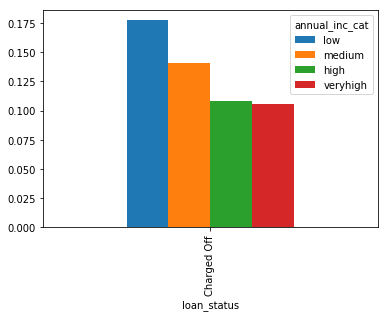

In [113]:
print(pd.crosstab(df['loan_status'],df['annual_inc_cat'],normalize='columns'))

pd.crosstab(df['loan_status'],df['annual_inc_cat'],normalize='columns')[0:1][['low','medium','high','veryhigh']].plot(kind='bar')

#### Analysis:

1. Customers with lower Annual Income i.e. less than 40000 holds around 17.7% of getting Charged Off
2. The probability of getting 'Charged Off' is inversely proportional to Annual income

<font color=red> __Approving loan for customers with lower Annual Incomes is risky.__</font>

__9. Loan Status Vs DTI:__

In [114]:
df.loc[df['dti'] <= 8 , 'dti_cat'] = 'low'
df.loc[df['dti'] >= 18 , 'dti_cat'] = 'high'
df.loc[(df.dti > 8) & (df.dti< 18) , 'dti_cat'] = 'medium'

dti_cat          high       low    medium
loan_status                              
Charged Off  0.161396  0.120017  0.141240
Current      0.035442  0.020556  0.028929
Fully Paid   0.803162  0.859427  0.829831


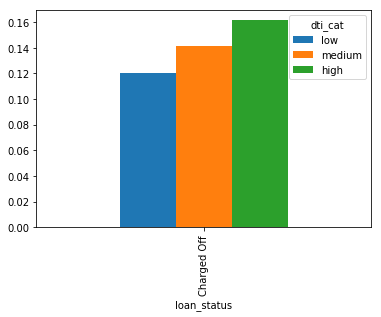

In [115]:
print(pd.crosstab(df['loan_status'],df['dti_cat'],normalize='columns'))

pd.crosstab(df['loan_status'],df['dti_cat'],normalize='columns')[0:1][['low','medium','high']].plot(kind='bar')

#### Analysis:

1. Customers with high dti are responsible for being Charged Off

<font color=red> __It is risky to lend loan for Customer with high DTI values__</font>

### B) Segmented Univariate Analysis

In [116]:
df.loc[df['loan_status'] == "Fully Paid" , 'loan_status'] = 0
df.loc[df['loan_status'] == "Charged Off" , 'loan_status'] = 1
df.loc[df['loan_status'] == "Current" , 'loan_status'] = 2

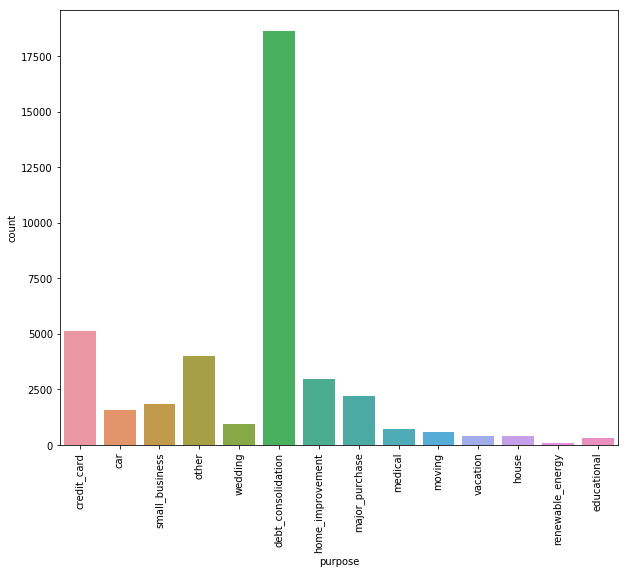

In [117]:
plt.figure(figsize=[10,8])
sns.countplot(x='purpose', data=df)
plt.xticks(rotation=90)
plt.show()

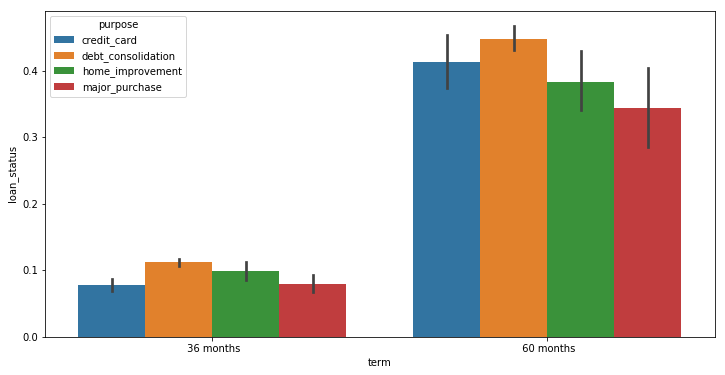

In [118]:
major_purposes = ["debt_consolidation","credit_card","home_improvement","major_purchase"]
df = df[df['purpose'].isin(major_purposes)]
plt.figure(figsize=(12, 6))
sns.barplot(x='term', y='loan_status', hue='purpose', data=df)
plt.show()

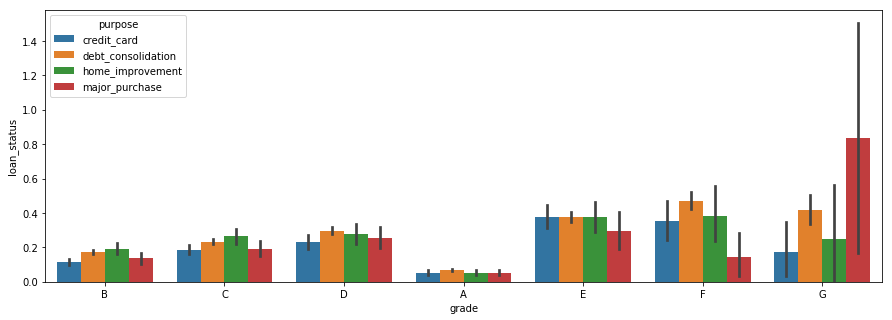

In [119]:
plt.figure(figsize=(15, 5))
sns.barplot(x='grade', y='loan_status', hue='purpose', data=df)
plt.show()

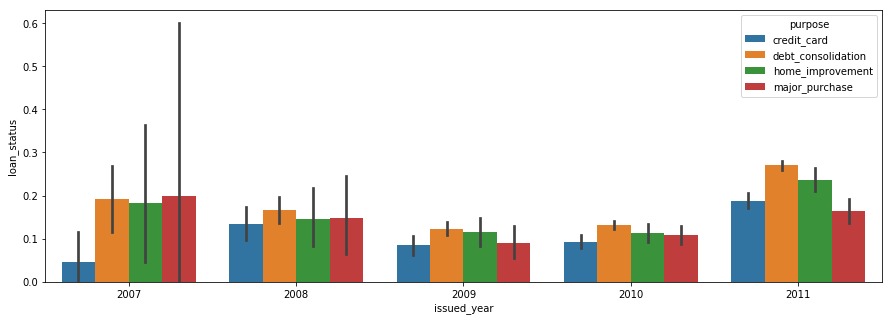

In [120]:
plt.figure(figsize=(15, 5))
sns.barplot(x='issued_year', y='loan_status', hue='purpose', data=df)
plt.show()

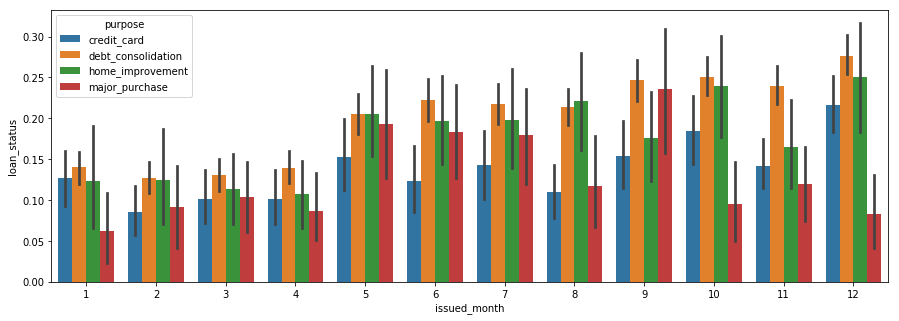

In [121]:
plt.figure(figsize=(15, 5))
sns.barplot(x='issued_month', y='loan_status', hue='purpose', data=df)
plt.show()

#### Analysis:

<font color=red>__From the above graphs following are the decisions which are risk for the company:__</font>

1. Loan taken for credit card, debt consolidation, home improvement and majot purchase
2. If the purpose belongs to 'Debt_consolidation' cateogry then it is risky to approve loan for a 60 month period
3. Offering loan for purpose 'Major_purchase' belonging to 'G-grade' is a risk.
4. Loan taken at year end are more risky than compared to loans given in the first quarter of the year.


# Entire Summary:

    Risk factors that defaults the Loan:
    
    1. Giving High Loan amount(> 30000). 20% of loans from this category are Charged Off.
    2. Loans given for term 60 months. 22% of the loans with term 60 months are Charged Off.
    3. Loans given with high interest rate(> 14%). 22% of such loans are Charged Off.
    4. Giving loans G-graded people. 31% of such loans are charged off.
    5. Lending loans to people with house owner type 'other. 18% of such loans are charged off
    6. Approving loans for low income people is risky(< 40,000). 18% of such loans are risky.
    7. Giving loans to people with high DTI.16% of such loans are charged off.
    
    